# Dataset
https://www.kaggle.com/datasets/mirichoi0218/insurance/data

# Importando e analisando o data frame

In [2]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,54,female,47.410,0,yes,southeast,63770.42801
2,18,male,33.770,1,no,southeast,1725.55230
3,28,male,33.000,3,no,southeast,4449.46200
4,33,male,22.705,0,no,northwest,21984.47061


In [3]:
df.shape

(1338, 7)

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Transformando os dados

In [6]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['sex', 'smoker']

le = LabelEncoder()
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])
    print(f'Classes for {column}: {le.classes_}')


Classes for sex: ['female' 'male']
Classes for smoker: ['no' 'yes']


In [7]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
regions_encoded = ohe.fit_transform(df[['region']])
regions_columns = ohe.get_feature_names_out()
encoded_columns = pd.DataFrame(data=regions_encoded.toarray(), columns=regions_columns)
df = pd.concat([df, encoded_columns], axis=1)
df.drop('region', axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,54,0,47.410,0,1,63770.42801,0.0,0.0,1.0,0.0
2,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
3,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
4,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0


In [8]:
df[['bmi', 'charges']] = df[['bmi', 'charges']].round(2)

# Analisando os dados

In [9]:
df[['age', 'bmi', 'charges', 'children']].describe().round(2)

,age,bmi,charges,children
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,13270.42,1.09
std,14.05,6.10,12110.01,1.21
min,18.00,15.96,1121.87,0.00
25%,27.00,26.30,4740.29,0.00
50%,39.00,30.40,9382.03,1.00
75%,51.00,34.69,16639.92,2.00
max,64.00,53.13,63770.43,5.00


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'region_northeast'}>,
        <Axes: title={'center': 'region_northwest'}>,
        <Axes: title={'center': 'region_southeast'}>],
       [<Axes: title={'center': 'region_southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

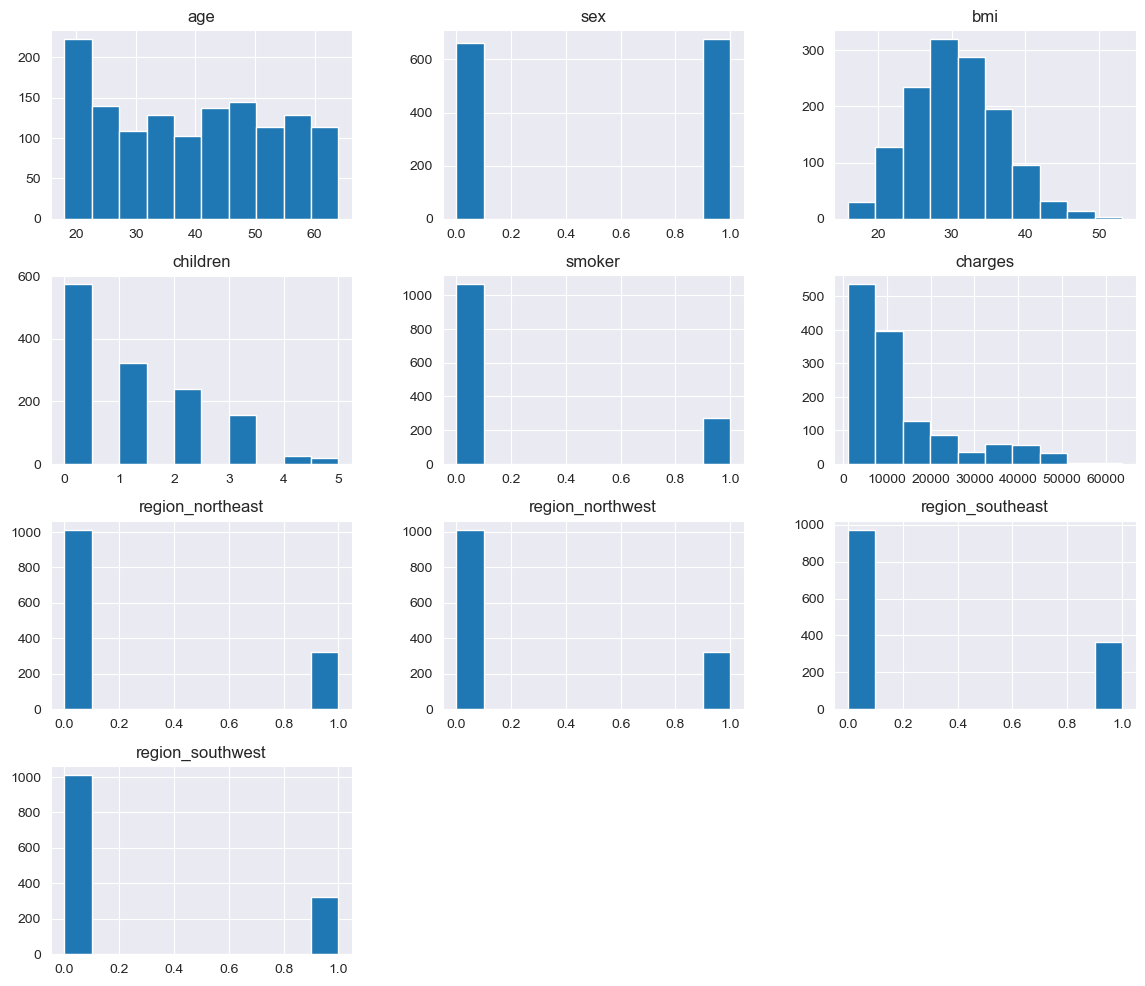

In [10]:
df.hist(figsize=(14, 12))

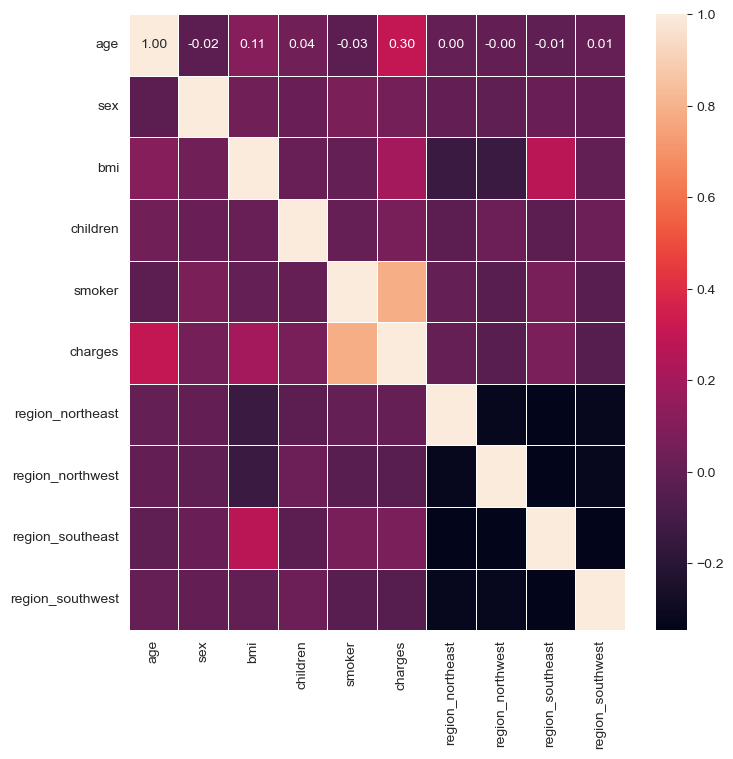

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=df.corr(), annot=True, linewidths=.5, fmt='.2f');

/home/lczago/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lczago/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lczago/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


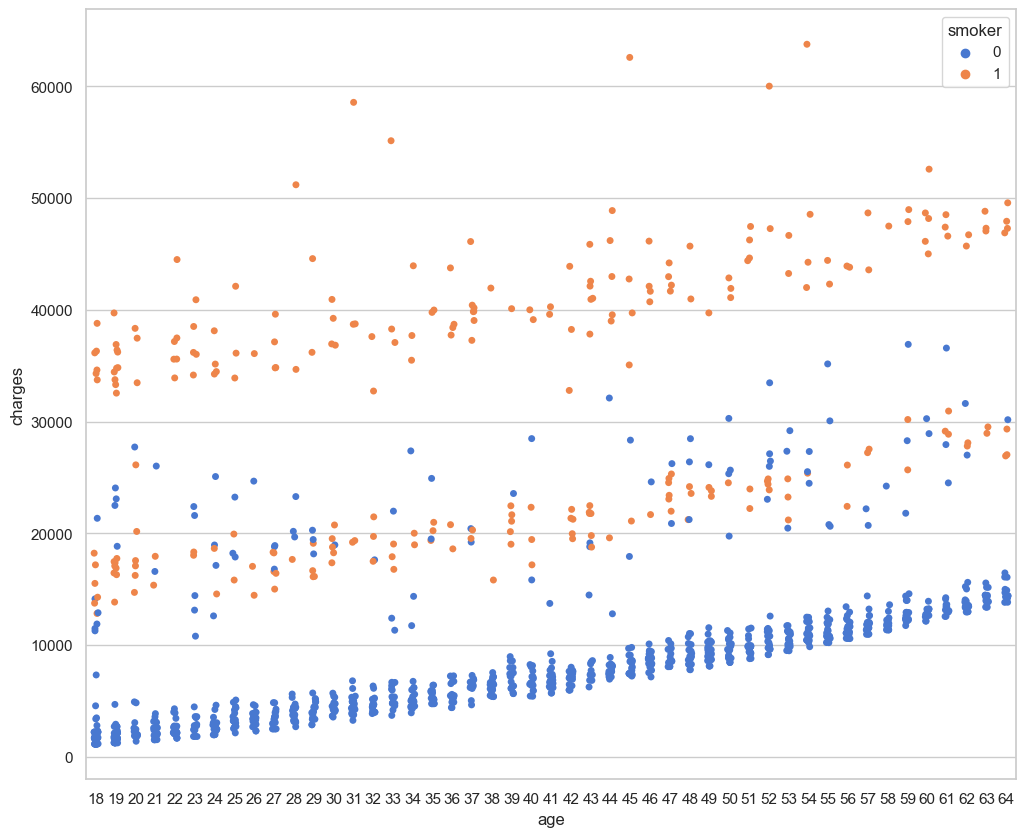

In [12]:
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid", palette="muted")

sns.stripplot(data=df, x="age", y="charges", hue="smoker", size=5)
plt.show()

# Separando os dados

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

x = df.drop('charges', axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Testando modelos

## Métrica

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def model_metric(test, prediction):
    errors = np.abs(test - prediction)
    relative_errors = errors / np.abs(test)
    mape = np.mean(relative_errors) * 100
    mae = mean_absolute_error(test, prediction)
    mse = mean_squared_error(test, prediction)
    rmse = np.sqrt(mse)
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2 Score: {r2_score(test, prediction) * 100:.2f}')
    print(f'MAPE: {mape:.2f}%')

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

model_metric(y_test, y_pred_lr)

MAE: 4027.95
MSE: 31770848.04
RMSE: 5636.56
R2 Score: 74.44
MAPE: 46.04%


## Gradient Boosting Regressor

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)

y_pred_gbr = gbr.predict(x_test)

model_metric(y_test, y_pred_gbr)

MAE: 2333.54
MSE: 17231000.04
RMSE: 4151.02
R2 Score: 86.14
MAPE: 31.05%


## Decision Tree Regressor

MAE: 2681.81
MSE: 20903791.15
RMSE: 4572.07
R2 Score: 83.19
MAPE: 39.46%


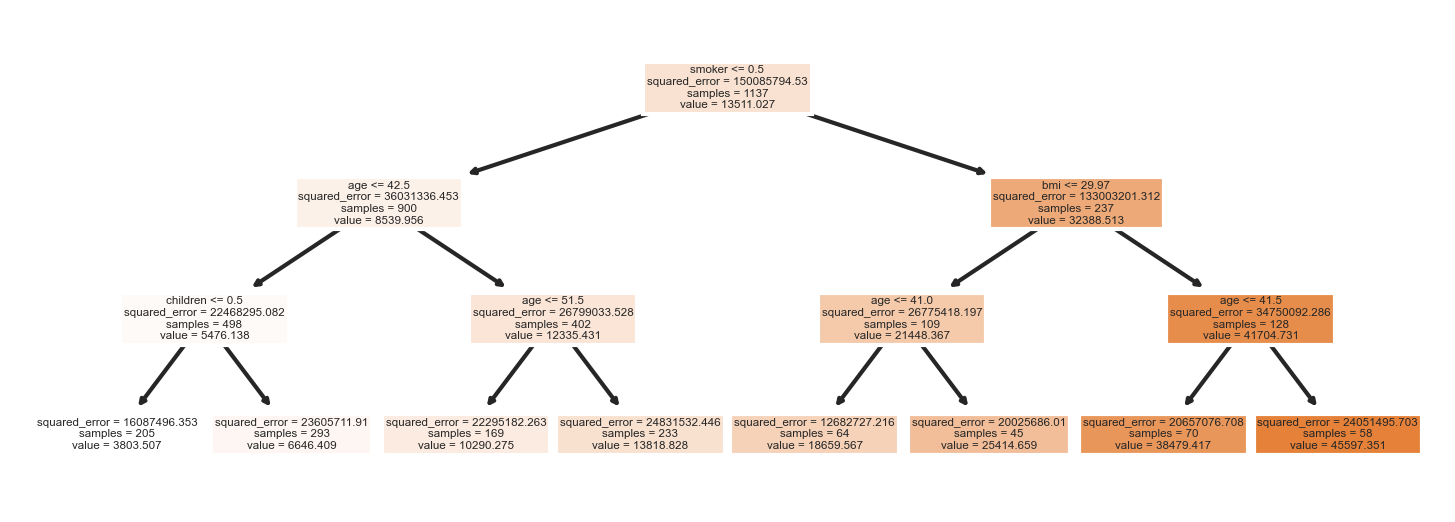

In [17]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(x_train, y_train)

y_pred_dtr = dtr.predict(x_test)
model_metric(y_test, y_pred_dtr)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 2), dpi=300)
plot_tree(dtr, feature_names=x.columns, ax=ax, filled=True)
plt.show()

## Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)

model_metric(y_test, y_pred_rfr)

MAE: 2534.62
MSE: 20107069.74
RMSE: 4484.09
R2 Score: 83.83
MAPE: 33.08%


# Analisando os resultados

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True)

lr_result = cross_val_score(lr, x, y, cv=kfold).mean()
dtr_result = cross_val_score(dtr, x, y, cv=kfold).mean()
gbr_result = cross_val_score(gbr, x, y, cv=kfold).mean()
rfr_result = cross_val_score(rfr, x, y, cv=kfold).mean()

models_result = {
    "LinearRegression": lr_result,
    "Decision Tree": dtr_result,
    "Gradient Boost": gbr_result,
    "Random Forest": rfr_result
}

best_model = max(models_result, key=models_result.get)
print(f"""
    LinearRegression (R^2): {lr_result}
    Decision Tree    (R^2): {dtr_result}
    Gradient Boost   (R^2): {gbr_result}
    Random Forest    (R^2): {rfr_result}
""")
print(f'Best model: {best_model} \nResult: {models_result[best_model] * 100:.2f}%')


    LinearRegression (R^2): 0.7414655356449089
    Decision Tree    (R^2): 0.8404996189268937
    Gradient Boost   (R^2): 0.8573348955730238
    Random Forest    (R^2): 0.8356175695218997

Best model: Gradient Boost 
Result: 85.73%


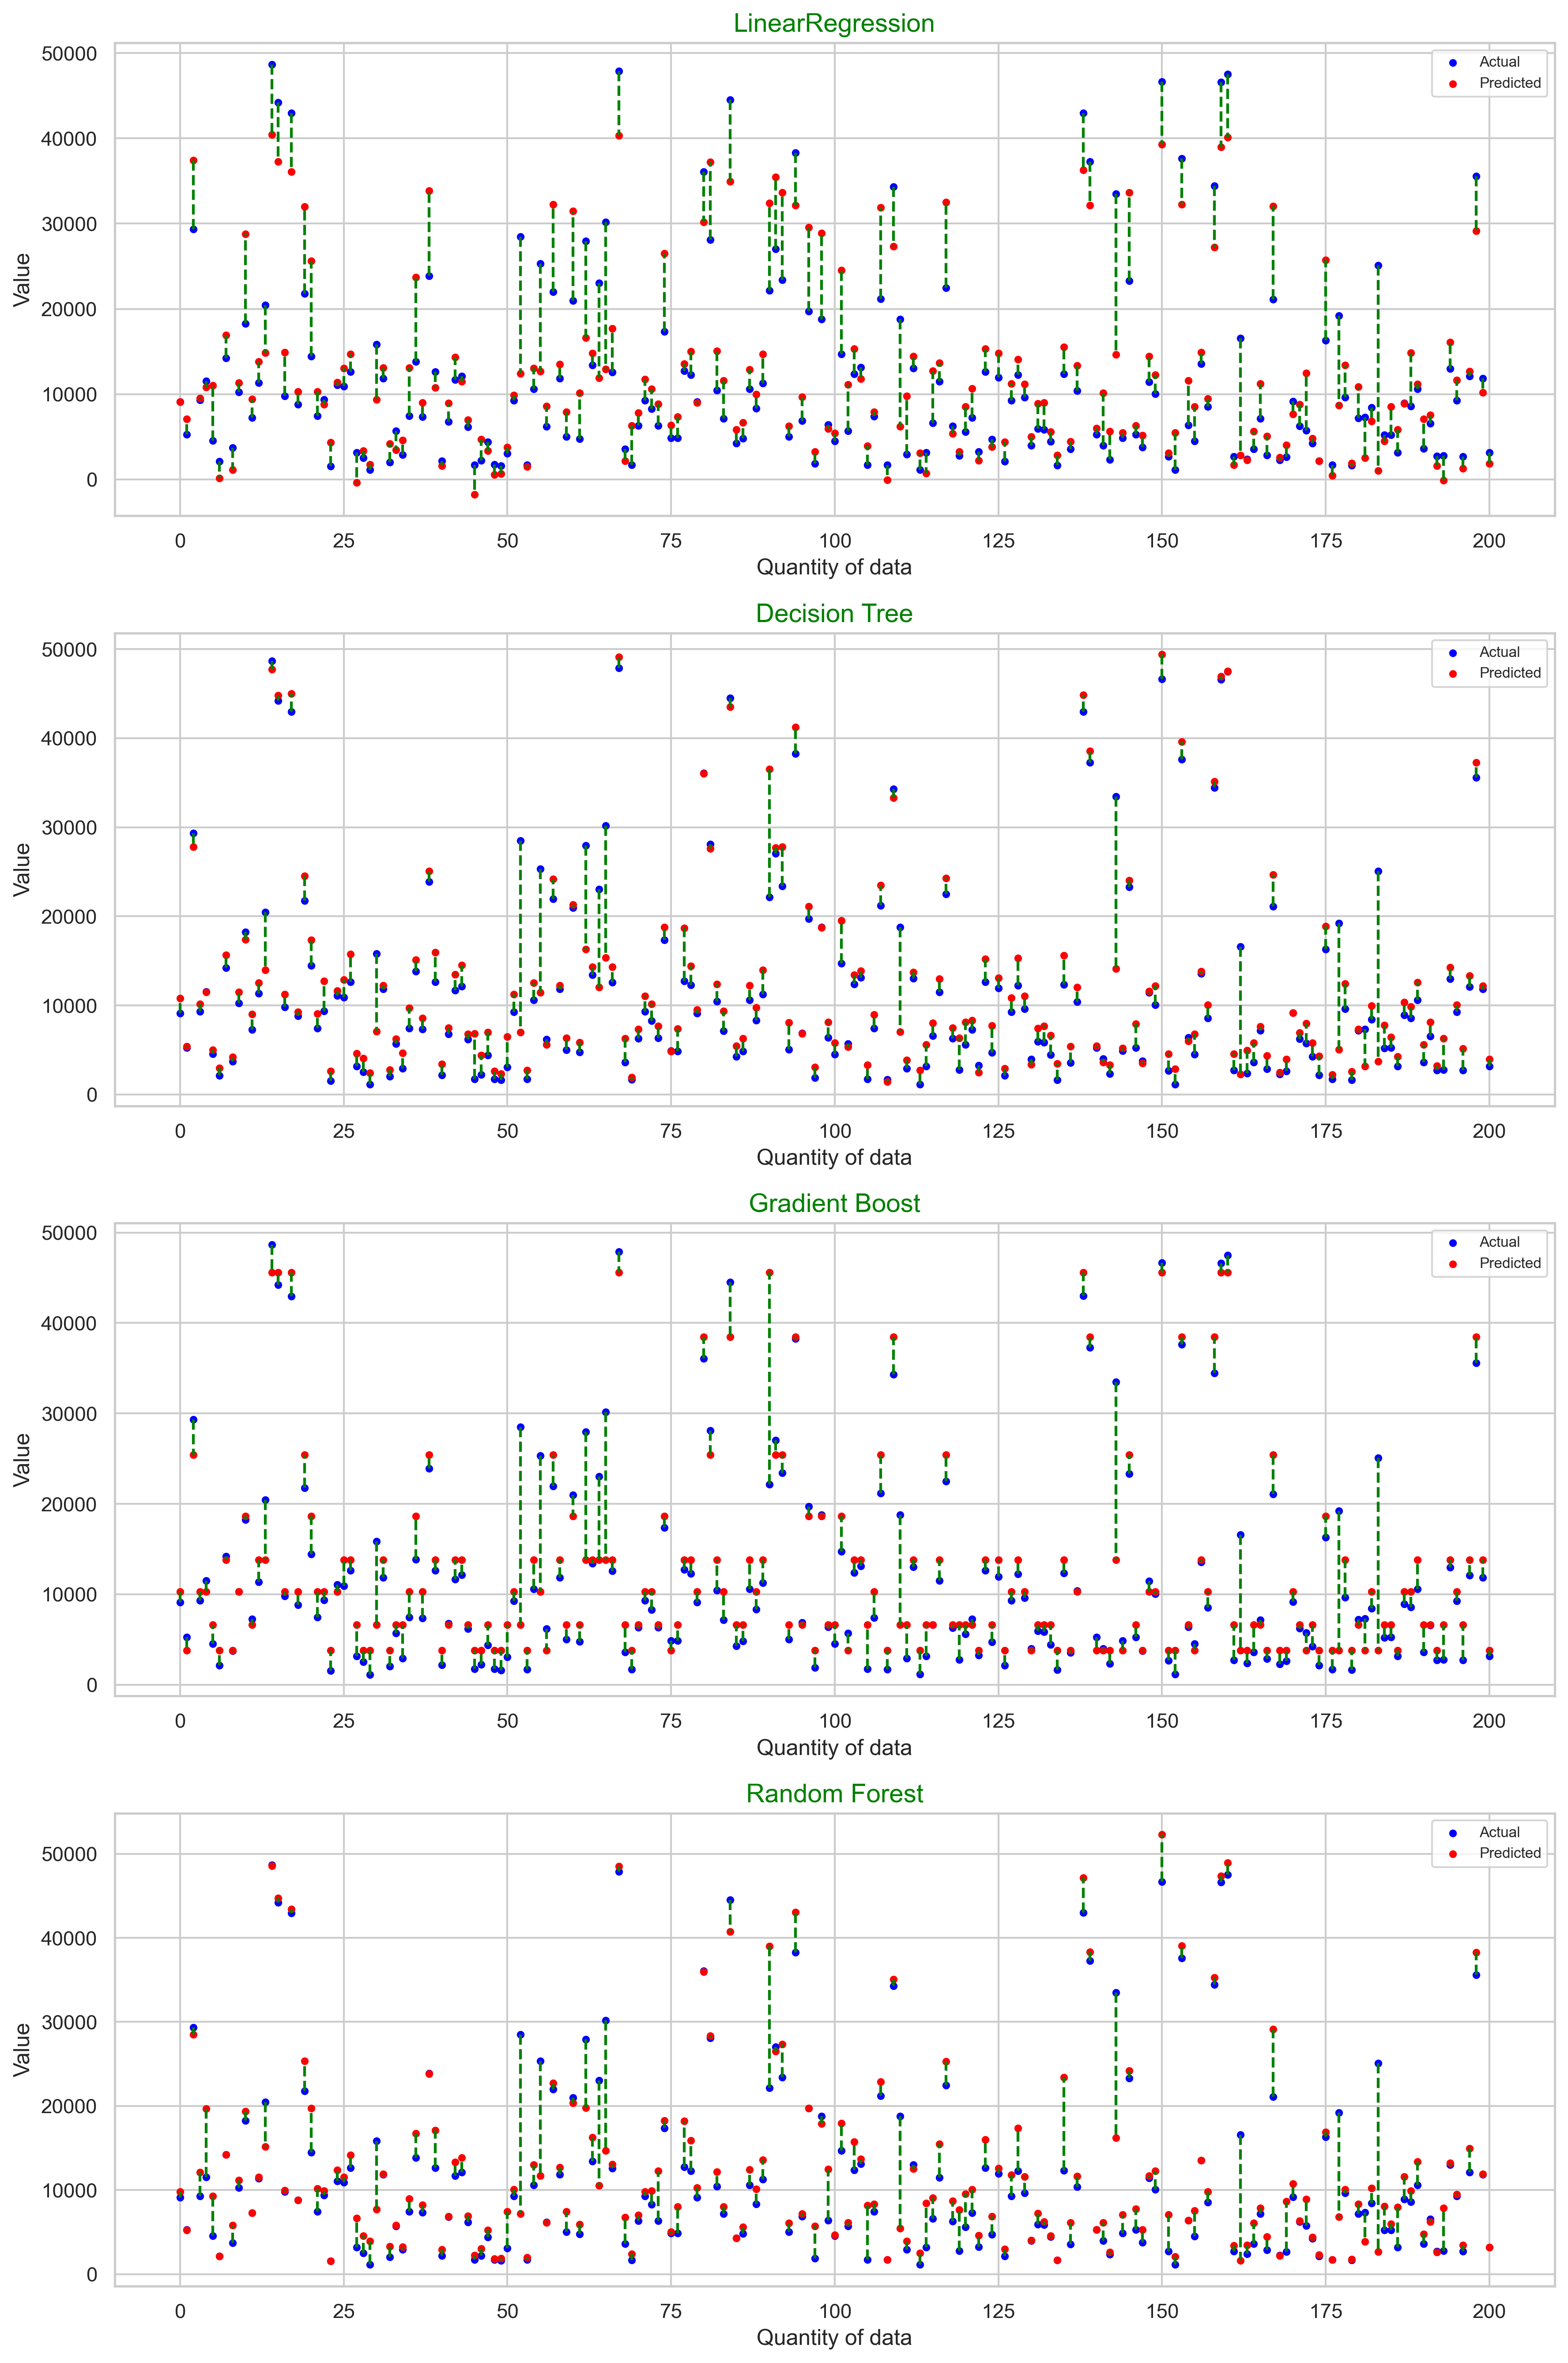

In [20]:
models_pred_result = {
    "LinearRegression": (y_test, y_pred_lr),
    "Decision Tree": (y_test, y_pred_gbr),
    "Gradient Boost": (y_test, y_pred_dtr),
    "Random Forest": (y_test, y_pred_rfr)
}

fig, axs = plt.subplots(len(models_pred_result), figsize=(12, 18), dpi=300)

for ax, (title, (actual, predicted)) in zip(axs, models_pred_result.items()):
    ax.scatter(range(len(actual)), actual, color='blue', label='Actual', s=10)
    ax.scatter(range(len(actual)), predicted, color='red', label='Predicted', s=10)

    ax.vlines(range(len(actual)), ymin=actual, ymax=predicted, color='green', linestyle='--')

    ax.set_xlabel('Quantity of data')
    ax.set_ylabel('Value')
    ax.set_title(title, fontsize=14, color='green')
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()